Caelan Osman

March 13, 2022

Homework 16.4

In [1]:
import time
import warnings
import umap
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings('ignore')

2022-03-14 08:48:05.406967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 08:48:05.406988: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Problem 16.6
### Part 1

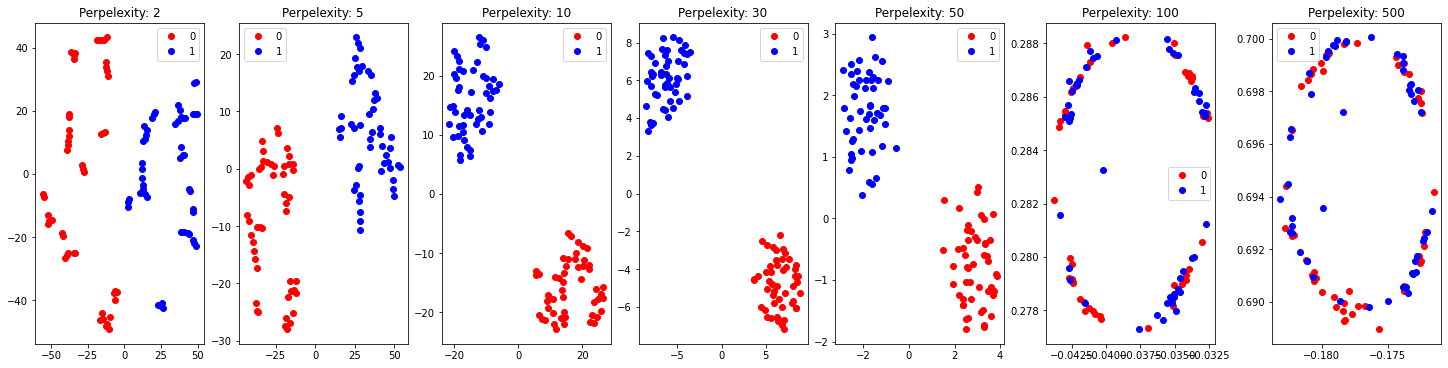

In [2]:
def two_disjoint_t_SNE(perplexity = [2, 5, 10, 30, 50, 100, 500], n_components=2):
    # get clsuters
    cluster1 = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size =50)
    cluster2 = np.random.multivariate_normal(mean=3*np.ones(3), cov=np.eye(3), size=50)
    clusters = np.concatenate((cluster1, cluster2))
    # embed and plot for each perplexity
    fig, axs = plt.subplots(1, 7, constrained_layout=True, figsize=(20, 5))
    for j, perp in enumerate(perplexity):
        embedded = TSNE(n_components=n_components, perplexity=perp, learning_rate='auto').fit_transform(clusters)
        c1_embedded = embedded[:50]
        c2_embedded = embedded[50:]
        ax = axs[j]
        ax.plot(c1_embedded[:, 0], c1_embedded[:, 1], 'ro', label='0')
        ax.plot(c2_embedded[:, 0], c2_embedded[:, 1], 'bo', label='1')
        ax.set_title('Perpelexity: ' + str(perp))
        ax.legend(loc='best')
    plt.show()

    return

two_disjoint_t_SNE()

### Part 2

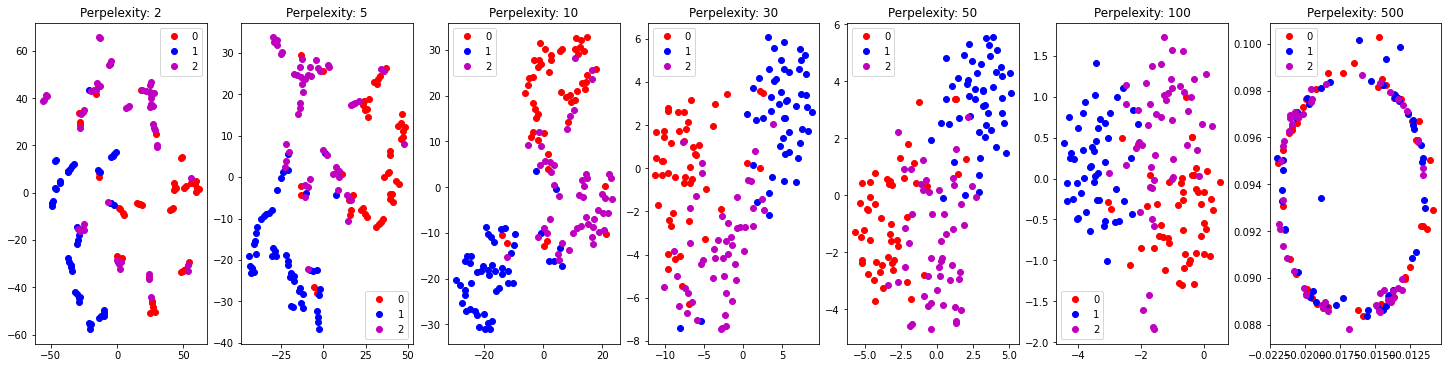

In [3]:
def three_disjoint_t_SNE(perplexity = [2, 5, 10, 30, 50, 100, 500], n_components=2):
    # get clusters
    cluster1 = np.random.multivariate_normal(mean = np.zeros(3), cov=np.eye(3), size=50)
    cluster2 = np.random.multivariate_normal(mean = 2*np.ones(3), cov=np.eye(3), size=50)
    cluster3 = np.random.multivariate_normal(mean = np.array([-1, 2, 1]), cov=np.eye(3), size=50)
    # concatenate everything
    clusters = np.concatenate((cluster1, cluster2, cluster3))

    fig, axs = plt.subplots(1, 7, constrained_layout=True, figsize=(20, 5))
    # now embed and plot
    for j, perp in enumerate(perplexity):
        embedded = TSNE(n_components=n_components, perplexity=perp, learning_rate='auto').fit_transform(clusters)
        c1_embedded = embedded[:50]
        c2_embedded = embedded[50:100]
        c3_embedded = embedded[100:]
        ax = axs[j]
        ax.plot(c1_embedded[:, 0], c1_embedded[:, 1], 'ro', label='0')
        ax.plot(c2_embedded[:, 0], c2_embedded[:, 1], 'bo', label='1')
        ax.plot(c3_embedded[:, 0], c3_embedded[:, 1], 'mo', label='2')
        ax.set_title('Perpelexity: ' + str(perp))
        ax.legend(loc='best')

    plt.show()

    return

three_disjoint_t_SNE()

### Part 3

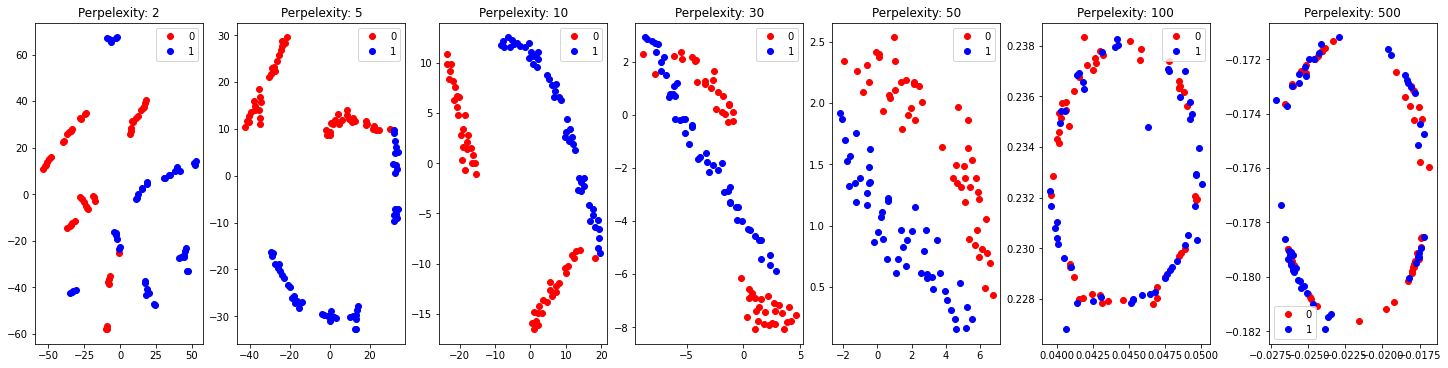

In [4]:
def line_t_SNE(perplexity = [2, 5, 10, 30, 50, 100, 500], n_components=2):
    # get lines
    line1 = np.random.multivariate_normal(mean=np.zeros(2), cov=np.array([[10, 0], [0, 0.1]]), size=50)
    line2 = np.random.multivariate_normal(mean=2*np.ones(2), cov=np.array([[10, 0], [0, 0.1]]), size=50)
    # concatenate
    lines = np.concatenate((line1, line2))

    fig, axs = plt.subplots(1, 7, constrained_layout=True, figsize=(20, 5))
    # now embed and plot
    for j, perp in enumerate(perplexity):
        embedded = TSNE(n_components=n_components, perplexity=perp, learning_rate='auto').fit_transform(lines)
        l1_embedded = embedded[:50]
        l2_embedded = embedded[50:]
        ax = axs[j]
        ax.plot(l1_embedded[:, 0], l1_embedded[:, 1], 'ro', label='0')
        ax.plot(l2_embedded[:, 0], l2_embedded[:, 1], 'bo', label='1')
        ax.set_title('Perpelexity: ' + str(perp))
        ax.legend(loc='best')

    plt.show()

    return

line_t_SNE()

### Part 4

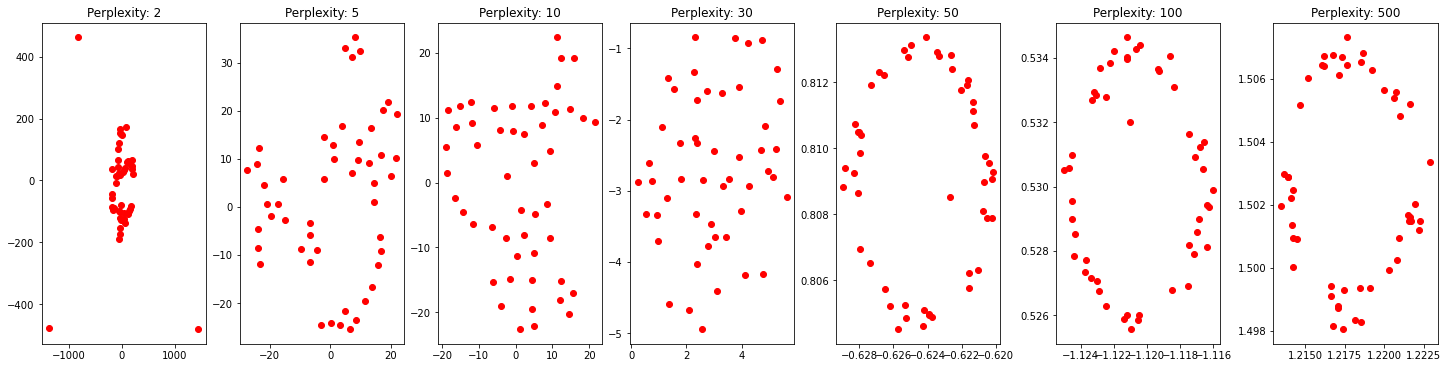

In [5]:
def single_normal_t_SNE(perplexity = [2, 5, 10, 30, 50, 100, 500], n_components=2):
    # get cluster
    cluster = np.random.multivariate_normal(mean = np.zeros(3), cov=np.eye(3), size=50)

    fig, axs = plt.subplots(1, 7, constrained_layout=True, figsize=(20, 5))
    # embed and plot
    for j, perp in enumerate(perplexity):
        c_embedded = TSNE(n_components=n_components, perplexity=perp, learning_rate='auto').fit_transform(cluster)
        ax = axs[j]
        ax.plot(c_embedded[:, 0], c_embedded[:, 1], 'ro')
        ax.set_title('Perplexity: ' + str(perp))

    plt.show()

    return

single_normal_t_SNE()

### Part 5


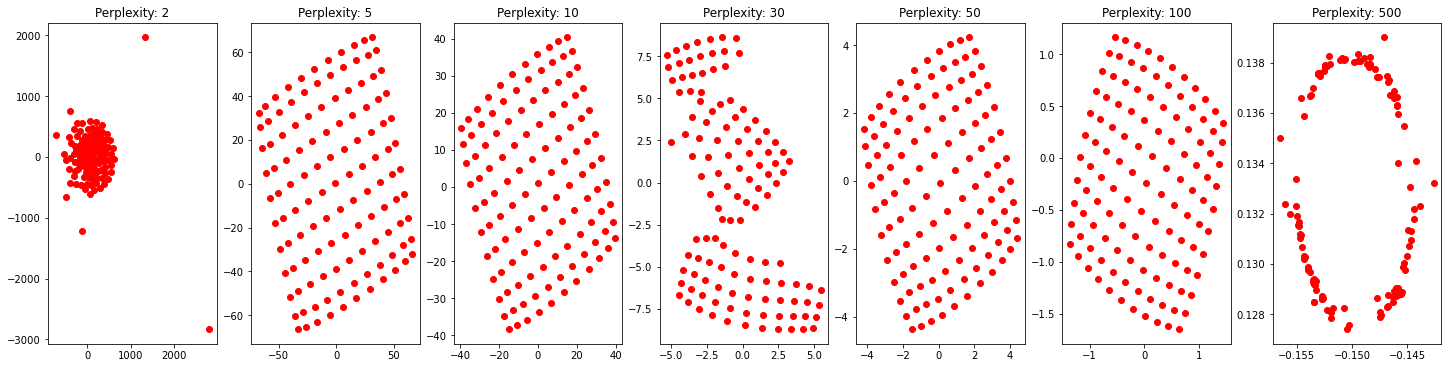

In [6]:
def integer_t_SNE(perplexity = [2, 5, 10, 30, 50, 100, 500], n_components=2):
    # get cluster of integer coordinates
    x_vals = np.arange(0, 11)
    y_vals = x_vals.copy()


    for i in range(x_vals.size):
        for j in range(y_vals.size):
            if i == 0 and j == 0:
                integer_coordinates = np.array([x_vals[0], y_vals[0]])
            else:
                integer_coordinates = np.vstack((integer_coordinates, np.array([x_vals[i], y_vals[j]])))

    fig, axs = plt.subplots(1, 7, constrained_layout=True, figsize=(20, 5))
    # now embed
    for j, perp in enumerate(perplexity):
        ic_embedded = TSNE(n_components=n_components, perplexity=perp, learning_rate='auto').fit_transform(integer_coordinates)

        ax = axs[j]
        ax.plot(ic_embedded[:, 0], ic_embedded[:, 1], 'ro')
        ax.set_title('Perplexity: ' + str(perp))
    plt.show()

    return

integer_t_SNE()

## Exercise 16.17

The goal is to find a lower dimensional manifold on which the data lies.
This is done by putting two distributions on the set of pairs $\{(i, j) | 1 \leq i \neq j \leq N\}$.
The first distribution $p_{ij}$ is the probability that the points in the original dat set are neighbors.
The second distribution $q_{ij}$ is the probability that the projected points are neighbors (we usually start with some
initial guess for a projection $f_0 : \mathscr{D} \to \mathbb{R}^s$).
The desired embedding is found by minimizing the $\mathbb{KL}$ divergence of the distributions $p_{ij}$ and $q_{ij}$.

## Exercise 16.18

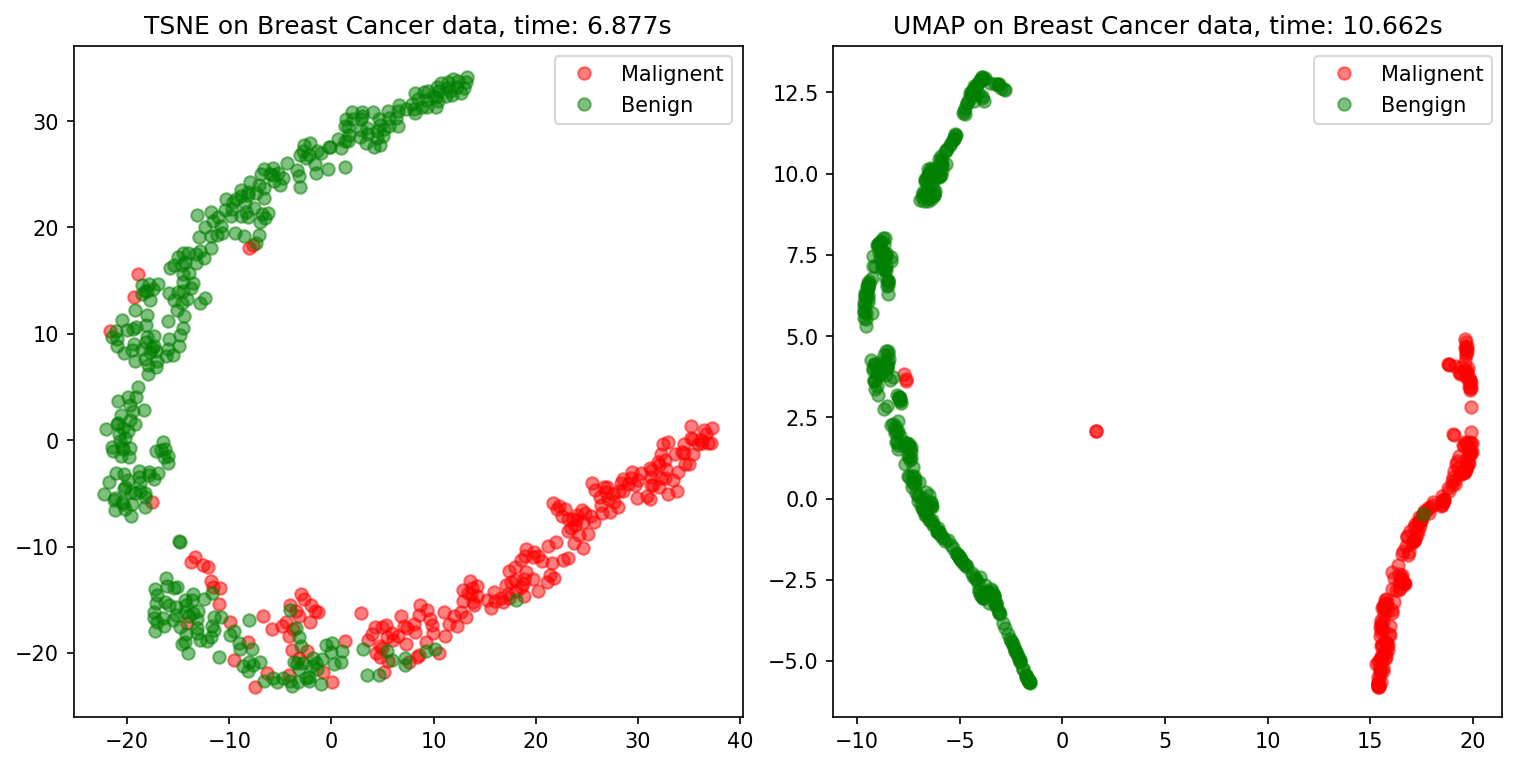

In [7]:
def BC_dataset():

    cancer = load_breast_cancer()
    X = cancer.data
    X -= X.mean(0)
    y = cancer.target

    maskM = y == 0
    maskB = y == 1

    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))
    fig.set_dpi(150)

    ########################
    # TSNE
    #########################
    tsne_start = time.time()
    cancer_embedded_TSNE = TSNE(n_components=2).fit_transform(X, y) 
    tsne_end = time.time()
    tsne_time = tsne_end - tsne_start

    ax = axs[0]
    ax.plot(cancer_embedded_TSNE[maskM, 0], cancer_embedded_TSNE[maskM, 1], 'ro', alpha=0.5, label='Malignent')
    ax.plot(cancer_embedded_TSNE[maskB, 0], cancer_embedded_TSNE[maskB, 1], 'go', alpha=0.5, label='Benign')
    ax.legend(loc='best')
    ax.set_title('TSNE on Breast Cancer data, time: ' + str(round(tsne_time, 3)) + 's') 

    umap_start = time.time()
    cancer_embedded_umap = umap.UMAP(n_components=2).fit_transform(X, y) 
    umap_end = time.time()
    umap_time = umap_end - umap_start

    ########################
    # UMAP
    #########################
    ax = axs[1]
    ax.plot(cancer_embedded_umap[maskM, 0], cancer_embedded_umap[maskM, 1], 'ro', alpha=0.5, label='Malignent')
    ax.plot(cancer_embedded_umap[maskB, 0], cancer_embedded_umap[maskB, 1], 'go', alpha=0.5, label='Bengign')
    ax.legend(loc='best')
    ax.set_title('UMAP on Breast Cancer data, time: ' + str(round(umap_time, 3)) + 's')
    plt.show()


    return

BC_dataset()

Looking back at the results we had with using $\operatorname{PCA}$ on the breast cancer dat set we can see that $\operatorname{tSNE}$ performed about as well as $\operatorname{PCA}$. 
That is, they both performed pretty well, but they both had areas where the two clusters overlapped. 
In other words, in certain regions both $\operatorname{PCA}$ and $\operatorname{tSNE}$ had trouble separating certain clusters. 
$\operatorname{UMAP}$, however, did a fantastic job of separating the clusters into distinct regions. 
It performed much better than either of the other methods. 
The one downfall $\operatorname{UMAP}$ has it is took almost double the time to train than $\operatorname{tSNE}$.


(Dr. J dropped 16.16 and on 16.18 I'm only plotting the BC data set because Dr. J mentioned he wanted us to do the same dataset we used for the PCA homework (problem 16.6)  https://acme2020-2022.slack.com/archives/C02EGG56P5E/p1646780051710309  )